<a href="https://colab.research.google.com/github/Aranzasuu/ADA-Informes/blob/main/Bellman_Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. PROBLEMA DE OPTIMIZACIÓN**

El problema consiste en encontrar una solución utilizando un grafo dirigido o no dirigido y ponderado con pesos, calcular un subgrafo conexo T ⊆ G conecte todos los vértices del grafo G y que la **suma** de los pesos de las aristas seleccionadas sea **mínima**.

Este problema no necesariamente tiene una única solución.​ Además, tiene diversas aplicaciones. Un ejemplo es encontrar el camino más rápido para ir de una ciudad a otra en un mapa. En este caso, los vértices representarían las ciudades y las aristas las carreteras que las unen, cuya ponderación viene dada por el tiempo que se emplea en atravesarlas.

> **↪ ENTRADA:** Un grafo G = (V, A) y sus vértices $v$ ∈ V asigandos con un valor real que corresponde a los pesos de éstos.
>
> **↪ SALIDA:** Retorna la distancia más corta entre 2 nodos de manera que la suma de los costes de estos nodos que lo constituyen es mínima.

Formalmente, dado un grafo ponderado (que es un conjunto $V$ de vértices, un conjunto $E$ de aristas y una función de variable real ponderada $f : E → R$ ) y un elemento $v ∈ V$ encuentra un camino $P$ de $v$ a $v' ∈ V$, tal que:

$$\sum_{p ∈ P} f(p)$$

es el mínimo entre todos los caminos que conectan $v$ y $v'$.

Los algoritmos más importantes para resolver este problema son:

- Algoritmo de Dijkstra: Resuelve el problema de los caminos más cortos desde un único vértice origen hasta todos los otros vértices del grafo.

- **Algoritmo de Bellman-Ford**: Resuelve el problema de los caminos más cortos desde un origen, la particularidad de éste es que acepta ponderaciones negativas.

- Algoritmo de Búsqueda A*: Resuelve el problema de los caminos más cortos entre un par de vértices usando la heurística para intentar agilizar la búsqueda.

- Algoritmo Floyd-Warshall: Resulve el problema entre todos los vértices del grafo.

- Algoritmo de Johnson: Resuelve el problema entre todos los vértices y es mejor que Floyd-warshall para grafos de baja densidad.

- Teorá pertubacional: Encuentra el peor de los casos del camino más corto a nivel local.

**APLICACIONES**

Estos algoritmos se aplican para encontrar direcciones de forma automática entre localizaciones físicas, tales como direcciones en mapas.

Donde los vértices describen estados, y las aristas posibles transiciones, así usandolos para encontrar una secuencia óptima de opciones para llegar a un estado dado. Por ejemplo, los estados de un puzzle como el cubo rubik.


# **2. ALGORITMO BELLMAN-FORD**

Este algoritmo se utiliza para encontrar la distancia más corta desde el vértice único a todos los demás vértices de un grafo ponderado. La diferencia de este algoritmo con los demás es que los pesos pueden tener valores negativos ya que permite detectar la existencia de un ciclo negativo.

La programación dinámica se utiliza en este algoritmo. Comienza con un vértice inicial y calcula las distancias entre otros vértices que puede alcanzar una sola arista. 

> **↪ ENTRADA:** Un grafo G = (V, A) y sus vértices $v$ ∈ V asigandos con un valor real que corresponde a los pesos de estos. Cabe destacar que los pesos pueden ser positivos y negativos.
>
> **↪ SALIDA:** Retorna la distancia más corta entre el nodo raíz y cualquier otro nodo del grafo.

**¿Por qué debemos tener cuidado con los pesos negativos?**

Los bordes de peso negativo pueden crear ciclos de peso negativos, es decir, un ciclo que reducirá la distancia total de la trayectoria al volver al mismo punto. 

**¿Cómo trabaja?**

El algoritmo parte de un vértice origen que será ingresado, a diferencia de Dijkstra que utiliza una técnica voraz para seleccionar vértices de menor peso y actualizar sus distancias mediante el paso de relajación, Bellman-Ford simplemente relaja todas las aristas y los hace $|V| - 1$ veces.

Para la detección de ciclos negativos realizamos el paso de relajación una vez más y si se obtuvieron mejores resultados es porque existe un ciclo negativo, para verificar porque tenemos un ciclo podemos seguir relajando las veces que queramos y seguiremos obteniendo mejores resultados.

La **relajación** es el paso más importante en este algoritmo. Ya que es lo que aumenta la presición de la distancia a cualquier vértice dado. Este funciona cortando continuamente la distancia calculada entre vértices comparando esa distancia con otras distancias conocidas.

**Pasos para encontrar la distancia más corta**

- Inicializamos el valor de distancaia infinito para cualquier otro vértice y establecer el valor de distancia 0 en el propio nodo de origen.

- Debemos visitar cada borde y relajar el camino, en el caso de que este no sea preciso. Para relajar el trazado para vértices y para aristas $u,v$:

> Si, $(d(u) + c(u,v) < d(v))$
>
> $d(v) = d(u) + c(u,v)$
>
> Esto significa que si la suma del valor de distancia del nodo de origen y el costo de moverse desde el origen al destino es menor que la distancia del vértice de origen. Luego, el valor de distancia del vértice de destino desde el vértice de origen será igual al valor de distancia del origen y el costo de llegar al destino desde el origen.

- Si el nuevo valor de distancia es menor que el anterior, debemos actualizar el valor de distancia en cada iteración para las aristas. El valor de distancia a cada nodo es la distancia total desde el vértice inicial hasta ese vértice en particular.

- Repetir los pasos anteriores en múltiples iteraciones, para asegurarse de que el resultado obtenido está optimizado.

**Subestructura óptima**

Tenemos dos situaciones si queremos encontrar el camino más óptimo, teniendo en cuenta $k$ arcos:

1. El camino más corto tiene $k-1$ arcos o menos, por lo que basta com encontrar el camino dentro de este rango.

2. El camino posee $k$ arcos, por lo que se realiza la subdivisión de los subproblemas.

> Función de recurrencia:
![image](https://i.imgur.com/lr2G2I1.png)

## **2.1 PSEUDOCÓDIGO**

```
Bellman-Ford (G,s)

Inicializar
    for cada v perteneciente a V[G]
        do d[v] = infinito
            p[v] = nulo
    p[s] = 0

for i=1 to V[G]-1 
    do for cada arco (u,v) perteneciente a A[G]
        Relajación(u,v,w)
        if d[v] > d[u] + w(u,v) then 
            d[v] = d[u] + w(u,v)
            p(v) = u

for cada arco (u,v) chequea lazo de peso negativo
    do if d[v] > d[u] + w(u,v) then
        return FALSO 'el algoritmo no converge
return VERDADERO
```

↪ El algoritmo devuelve un valor booleano si encuentra un circuito o lazo de peso negativo. En caso contrario, calcula y devuele el camino mínimo con su coste. Para cada vértice $v$ perteneciente a $V$, se mantiene el atributo $d[v]$ como cota superior o coste del camino mínimo desde el origen $s$ al vértice $v$.

In [14]:
# Importación de las librerías
import matplotlib.pyplot as plt
import math
import datetime
import seaborn as sns
from timeit import repeat
import numpy as np
import random
from termcolor import colored
from sys import maxsize

In [12]:
def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [9]:
import networkx as nx

def create_graph(edges):
  graph = nx.DiGraph()
  graph.add_weighted_edges_from(edges)
  
  return graph

In [18]:
def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple].
        Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

In [19]:
def visualize_graph(lista_grafo, n):
    """
        Input: Un grafo en formato list[tuple].
        Ej: [(x1, y1, peso1), (x2, y2, peso2), ...].
        Output: No retorna nada. Imprime el grafo.
    """
    grafoNX = graph_to_nxdigraph(lista_grafo, n)
    pos = nx.circular_layout(grafoNX)
    labels = nx.get_edge_attributes(grafoNX, 'weight')

    nx.draw_networkx(grafoNX, pos)
    nx.draw_networkx_edge_labels(grafoNX, pos, edge_labels=labels)
    plt.show()

## **2.2 ALGORITMO BELLMAN FORD**

Vertex Distance from Source
0		0
1		-1
2		2
3		-2
4		1


VISUALIZACIÓN GRAFO


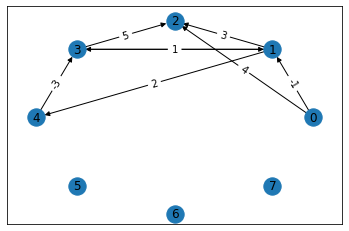

In [29]:
def BellmanFord(graph, V, E, src):
 
    # Inicializamos la distancia de todos los vertices con infinito.
    dis = [maxsize] * V
 
    # Inicializamos las distancia del origen con 0
    dis[src] = 0

    # Relajamos todos los vértices |V| - 1 veces.
    # Un camino corto simple desde src a otro vértice
    # puede tener como máximo |V| - 1 aristas.
    for i in range(V - 1):
        for j in range(E):
            if dis[graph[j][0]] + graph[j][2] < dis[graph[j][1]]:
                dis[graph[j][1]] = dis[graph[j][0]] + graph[j][2]

    # Comprobar si hay ciclos de peso negativo. 
    # El paso anterior garantiza las distancias más cortas 
    # si el gráfico no contiene un ciclo de peso negativo. 
    # Si obtenemos un camino más corto, entonces hay un ciclo.

    for i in range(E):
        x = graph[i][0]
        y = graph[i][1]
        weight = graph[i][2]
        if dis[x] != maxsize and dis[x] + weight < dis[y]:
            print("Graph contains negative weight cycle")
 
    print("Vertex Distance from Source")
    for i in range(V):
        print("%d\t\t%d" % (i, dis[i]))
 
V = 5 # Number of vertices in graph
E = 8 # Number of edges in graph
 
# Every edge has three values (u, v, w) where
# the edge is from vertex u to v. And weight
# of the edge is w.
graph = [[0, 1, -1], [0, 2, 4], [1, 2, 3],
         [1, 3, 2], [1, 4, 2], [3, 2, 5],
         [3, 1, 1], [4, 3, -3]]

BellmanFord(graph, V, E, 0)
print("\n\nVISUALIZACIÓN GRAFO")
visualize_graph(graph, E)

## **2.3 ALGORITMO DE DIJKSTRA**

In [30]:
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex \t Distance from Source")
        for node in range(self.V):
            print(node, "\t\t", dist[node])

    def minDistance(self, dist, sptSet):
 
        min = 1e7

        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
 
        return min_index

def dijkstra(self, src):
 
        dist = [1e7] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
            u = self.minDistance(dist, sptSet)
            sptSet[u] = True

            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]
 
        self.printSolution(dist)
 

g = Graph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
           [4, 0, 8, 0, 0, 0, 0, 11, 0],
           [0, 8, 0, 7, 0, 4, 0, 0, 2],
           [0, 0, 7, 0, 9, 14, 0, 0, 0],
           [0, 0, 0, 9, 0, 10, 0, 0, 0],
           [0, 0, 4, 14, 10, 0, 2, 0, 0],
           [0, 0, 0, 0, 0, 2, 0, 1, 6],
           [8, 11, 0, 0, 0, 0, 1, 0, 7],
           [0, 0, 2, 0, 0, 0, 6, 7, 0]
           ]
 
g.dijkstra(0)

Vertex 	 Distance from Source
0 		 0
1 		 4
2 		 12
3 		 19
4 		 21
5 		 11
6 		 9
7 		 8
8 		 14


## **2.4 EJEMPLO**

Para entender de mejor manera como funciona el algoritmo, veremos un ejemplo paso a paso. Como podemos observar en la imagen de nuestro grafo original, contiene 5 nodos, por lo que realizaremos |V| - 1 iteraciones, es decir 4.

> ![image](https://www.simplilearn.com/ice9/free_resources_article_thumb/Bellman%20Ford%20Algorithm/Example-of-bellman-ford-algorithm.png)

↪ Elija el valor de la ruta 0 para el vértice de origen e infinito para todos los dempas vértices.

> ![image](https://www.simplilearn.com/ice9/free_resources_article_thumb/Bellman%20Ford%20Algorithm/Example-of-bellman-ford-algorithm1.png)

↪ Si la nueva longitud de trazado calculada es inferior a la longitud de trazado anterior, vaya a la arista vecina del vértice de origen y relaje la longitud del trazado del vértice adyacente.

> ![image](https://www.simplilearn.com/ice9/free_resources_article_thumb/Bellman%20Ford%20Algorithm/Example-of-bellman-ford-algorithm2.png)

↪ Como se dijo anteriormente, el procedimiento debe repetrise |V|- 1 veces. Esto sucedió porque, en el peor de los casos, la longitud de la ruta de cualquier vértice puede cambiar N veces a una longitud de ruta aún más corta.

> ![image](https://www.simplilearn.com/ice9/free_resources_article_thumb/Bellman%20Ford%20Algorithm/Example-of-bellman-ford-algorithm3.png)

> ![image](https://www.simplilearn.com/ice9/free_resources_article_thumb/Bellman%20Ford%20Algorithm/Example-of-bellman-ford-algorithm3.png)

↪ Como resultado, después de las iteraciones, encontrará sus nuevas longitudes de ruta y puede determinar si el gráfico tiene un ciclo negativo o no.

> ![image](https://www.simplilearn.com/ice9/free_resources_article_thumb/Bellman%20Ford%20Algorithm/Example-of-bellman-ford-algorithm5.png)

# **3. CORRECTITUD**

Para poder probar que el algoritmo de Bellman-Ford funciona, utilizaremos **inducción matemática**, donde:

1. Probar $P(n)$ para un caso base, por ejemplo $P(1)$.
2. Probar que si $P(m)$ es cierto, donde $m<n$, entonces $P(n)$ también lo es.

**Teorema:** Sea G un grafo (orientado o no) sin circuitos negativos y $s ∈ V$ un nodo de origen. Al comenzar la k-ésima iteración, el algoritmo de Bellman-Ford determina un camino mínimo de a lo más k − 1 aristas de $s$ a los nodos de G.

> **Caso Base:** ($k = 1$) Los camino mínimos de longitud cero desde $s$ son los que van a $s$ y a los nodos no alcanzables desde $s$. Luego el lema vale trivialmente por cómo se inicializaron los valores de ϵ.
>
> **Paso inductivo:** Supongamos que el lema vale para algún $k ≥ 1$ y veamos que vale para $k+1$. Sea el comienzo de la k-ésima iteración y sea $v ϵ V$. Si existe un camino mínimo de a lo más $k-1$ aristas a $v$, por hipótesis inductiva, el algoritmo ya lo determinó. Supongamos ahora que los camino mínimo a $v$ tienen exactamente $k$ aristas y sea $P$ uno de ellos y $(u,v)$ la última arista de $P$. Por subestructura óptim de camino mínimo, $P' = P -(u,v)$ es un camino mínimo a $u$. Luego, por hipótesis inductiva, $ϵ(u)= 𝝳(s,u) + w(u,v) = w(P) = 𝝳(s,v)$.

# **4. TIEMPO DE EJECUCIÓN**

## **4.1 Tiempo de ejecución de Bellman-Ford**

- En primer lugar, se realiza el paso de inicialización ⇒ O(V)

- Luego, el algoritmo itera $|V| - 1$ los tiempos con cada iteración ⇒ O(1)

- Después de $|V| - 1$ de las interacciones. el algoritmo elige todas las aristas y luego llama la función Relax(). Elegir todos los bordes lleva tiempo más la función Relax() ⇒ O(1) + O(E)

En **conclusión**, la complejidad para hacer todas la operaciones del algoritmo lleva un tiempo de **O(VE)**

## **4.2 Tiempo de ejecución de Dijkstra**

Orden de complejidad del algoritmo:

$O(|V|²+|A|) = O(|V|²)$, sin utilizar cola de prioridad, $O((|A|+|V|) log |V|) = O(|A| log |V|)$ utilizando cola de prioridad (por ejemplo, un montículo binario o un árbol binario balanceado). Por otro lado, si se utiliza un montículo de Fibonacci, sería $O(|V| log |V|+|A|)$.

La complejidad de este algoritmo se puede calcular contando las operaciones realizadas:

- El algoritmo consiste en $n-1$ iteraciones, como máximo. En cada iteración, se añade un vértice al conjunto distinguido.

- En cada iteración, se identifica el vérticde con la menor etiqueta entre los que no están en $S_k$. El número de estas operaciones está acotado por $n-1$.

- Además, se realizan una suma y una comparación para actualizar la etiqueta de cada uno de los vértices que no están en $S_k$.

Luego, en cada iteración se realizan a lo más $2(n-1)$ operaciones. Entonces:

Teorema: El algoritmo de Dijkstra realiza O(n²) operaciones (sumas y comparaciones) para determinar la longitud del camino más corto entre dos vértices de un grafo ponderado simple, conexo y no dirigido con n vértices.

En general:

Tiempo de ejecución = $O(|A| * 𝑻_{𝒅𝒌} + |v| * 𝑻_{𝒅𝒎})$

$|A|$: Número de aristas

$𝑻_{𝒅𝒌}$: Complejidad de disminuir clave

$|V|$: Número de vértices

$𝑻_{𝒅𝒎}$: Complejidad de extraer mínimo

# **5. EXPERIMENTACIÓN**

## **DIFERENCIA BELLMAN-FORD V/S DIJKSTRA**

![image](https://i.imgur.com/DdUjTBj.png)